In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
image_path = "../output_vids/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

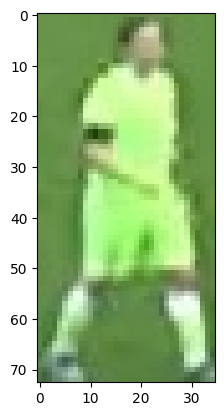

In [3]:
plt.imshow(image)
plt.show()

# Take the top half of the image

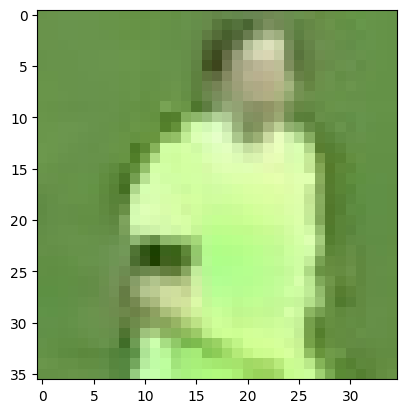

In [4]:
top_half_image = image[0: int(image.shape[0] / 2), :]
plt.imshow(top_half_image)

# Cluster the image into two clusters

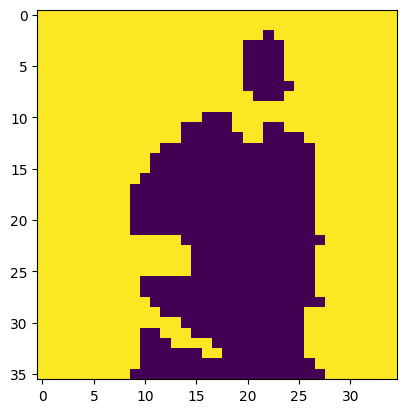

In [7]:
# reshape cluster into 2D array of pixels
image_2d = top_half_image.reshape(-1, 3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

# get cluster labels
labels = kmeans.labels_

# reshape labels back into original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# display clustered image
plt.imshow(clustered_image)
plt.show()

In [8]:
corner_clusters = clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
non_player_cluster

1

In [9]:
player_cluster = 1 - non_player_cluster
player_cluster

0

In [10]:
kmeans.cluster_centers_[player_cluster]

array([197.5436409 , 240.2319202 , 151.63341646])